In [1]:
import pandas as pd
import mat73
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import scipy.io as sio
from itertools import repeat
sns.set()
import matplotlib as mpl

normcolor = mpl.colors.Normalize(vmin=0.,vmax=1.)
%config InlineBackend.figure_format='retina'
mpl.rcParams['pdf.fonttype'] = 42


In [53]:
norm = pd.concat([pd.read_pickle(file) for file in glob.glob('../data/norm_signals/*.gz')], axis=1)

In [40]:
def load_hits(tf):
    motifs_hits = pd.read_csv('../data/motif_hits/motifs_hits_{}.csv'.format(tf), index_col=0)
    motifs_hits = motifs_hits.loc[:, ['Chromosome', 'start_sig', 'stop_sig', 'Strand']]
    return motifs_hits

In [41]:
def get_abs(working_norm, motifs_hits):
    signal = []
    for hit in motifs_hits.values:
        chr_loc, start, stop, strand = hit
        if strand == '+':
            signal.append(working_norm.loc[chr_loc][start:stop])
        else:
            signal.append(working_norm.loc[chr_loc][start:stop][::-1])
    return working_norm.squeeze().name, np.array(signal)

In [42]:
all_tfs = ['Vhr1',
 'Nrg2',
 'Pdr8',
 'Abf1',
 'Crz1',
 'Gln3',
 'Reb1',
 'Met31',
 'Rpn4',
 'Sko1',
 'Cst6', 'Msn2', 'Gal4', 'Gcn4', 'Yap1', 'Mig3']

In [43]:
iterate = lambda x: get_abs(norm.loc[:, x], load_hits(x))

In [55]:
bign = norm

In [56]:
def convert_name(tf, name):
    if 'Full' in name:
        return '{}_Full'.format(tf)
    elif 'Gal4AD' in name:
        return '{}_DBDGal4AD'.format(tf)
    elif 'Gcn4AD' in name:
        return '{}_DBDGcn4AD'.format(tf)
    else:
        return tf

In [57]:
bign

,Msn2DBD_Gcn4AD_dMsn2_deletions_tef_3_reps_0.99_meancorr,Gln3Full_nodeletion_tef_3_reps_0.82_meancorr,Gln3DBD_Gal4AD_nodeletion_tef_3_reps_0.69_meancorr,Gal4DBD_Gcn4AD_dGal4_deletions_tef_3_reps_0.97_meancorr,Abf1DBD_Gal4AD_nodeletion_tef_3_reps_0.9_meancorr,Mig3DBD_Gal4AD_dMig3_deletions_tef_3_reps_0.94_meancorr,Mig3Full_dMig3_deletions_tef_2_reps_0.99_meancorr,Nrg2DBD_Gcn4AD_nodeletion_tef_2_reps_0.97_meancorr,Gal4DBD_Gal4AD_dGal4_deletions_tef_3_reps_0.95_meancorr,Rpn4DBD_Gcn4AD_nodeletion_tef_3_reps_0.91_meancorr,...,Gcn4Full_dGcn4_deletions_tef_3_reps_0.98_meancorr,Rpn4Full_dRpn4_deletions_tef_3_reps_0.95_meancorr,Pdr8DBD_Gal4AD_nodeletion_tef_2_reps_0.73_meancorr,Mig3DBD_Gcn4AD_dMig3_deletions_tef_3_reps_0.97_meancorr,Rpn4DBD_Gal4AD_nodeletion_tef_2_reps_0.93_meancorr,Yap1DBD_Gcn4AD_dYap1_deletions_tef_2_reps_0.97_meancorr,Yap1Full_dYap1_deletions_tef_3_reps_0.99_meancorr,Vhr1Full_nodeletion_tef_2_reps_0.95_meancorr,Sko1DBD_Gcn4AD_nodeletion_tef_2_reps_0.95_meancorr,Nrg2DBD_Gal4AD_nodeletion_tef_2_reps_0.8_meancorr
1,"[0.0, 2.1503103087052433, 1.3650346244445075, ...","[1.494338102363953, 0.0, 2.988676204727906, 0....","[0.0, 0.30063872199681835, 0.30063872199681835...","[1.560303437708744, 0.7588100310740296, 0.0, 2...","[0.2605703013591946, 0.0, 0.0, 0.0, 0.26057030...","[0.0, 6.015864436104451, 4.684799652200474, 3....","[0.0, 2.224089468891883, 15.56171776097952, 0....","[0.0, 0.0, 4.478930216475655, 3.43763421096898...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.4408165164831572, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 2.890591543661157, 0.0, 0.0, 0...","[0.0, 0.0, 8.963360471401053, 4.48168023570052...","[2.196603420261287, 2.524498989632749, 1.91314...","[6.123722713916331, 4.8989781711330656, 30.815...","[0.0, 1.8247221694007496, 0.0, 0.0, 0.0, 0.850...","[0.0, 3.616287978030327, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 1.7768585496214404, 0.0, 1.7768585496214...","[1.7298236825316868, 1.7298236825316868, 2.916...","[10.790309056232747, 0.0, 0.0, 1.3738577403282..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.752...","[1.494338102363953, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 15.939125292682187, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2605703013591946, 0.0, 0.0, 1.3028515067959...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.4696223381688467, 0.0, ...","[0.0, 0.0, 0.0, 3.674233628349799, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.7768585496214404, 0.0, 0.0, 1.7768585496214...","[0.0, 0.0, 0.0, 1.7298236825316868, 0.0, 0.0, ...","[1.3738577403282477, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.6825173122222538, 0.0, 0.0, ...","[1.494338102363953, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.30063872199681835, 0.3006387...","[0.8703056583096437, 1.6717990649443581, 0.0, ...","[0.7817109040775838, 20.688950153253284, 0.260...","[6.015864436104451, 0.0, 13.593328756275726, 1...","[4.448178937783766, 0.0, 8.88254083304021, 0.0...","[3.411488694764905, 2.2656106244419094, 2.2917...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.4408165164831572, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.721940413888...",...,"[4.931407091724909, 1.6050032445140587, 3.2100...","[3.5749259338677484, 0.0, 1.4452957718305786, ...","[13.445040707101581, 49.602450806003, 8.963360...","[2.028509130874628, 0.4696223381688467, 0.0, 1...","[6.123722713916331, 33.2652096421466, 11.02270...","[0.9743295346173437, 0.0, 0.0, 0.8503926347834...","[0.0, 3.0115755739900028, 0.9267

In [58]:
names

['Msn2DBD_Gcn4AD_dMsn2_deletions_tef_3_reps_0.99_meancorr',
 'Msn2DBD_Gal4AD_nodeletion_tef_2_reps_0.95_meancorr',
 'Msn2Full_nodeletion_tef_2_reps_0.99_meancorr',
 'Msn2Full_dMsn2_deletions_tef_4_reps_0.99_meancorr',
 'Msn2DBD_Gal4AD_dMsn2_deletions_tef_3_reps_0.99_meancorr',
 'Msn2DBD_Gcn4AD_nodeletion_tef_2_reps_0.95_meancorr']

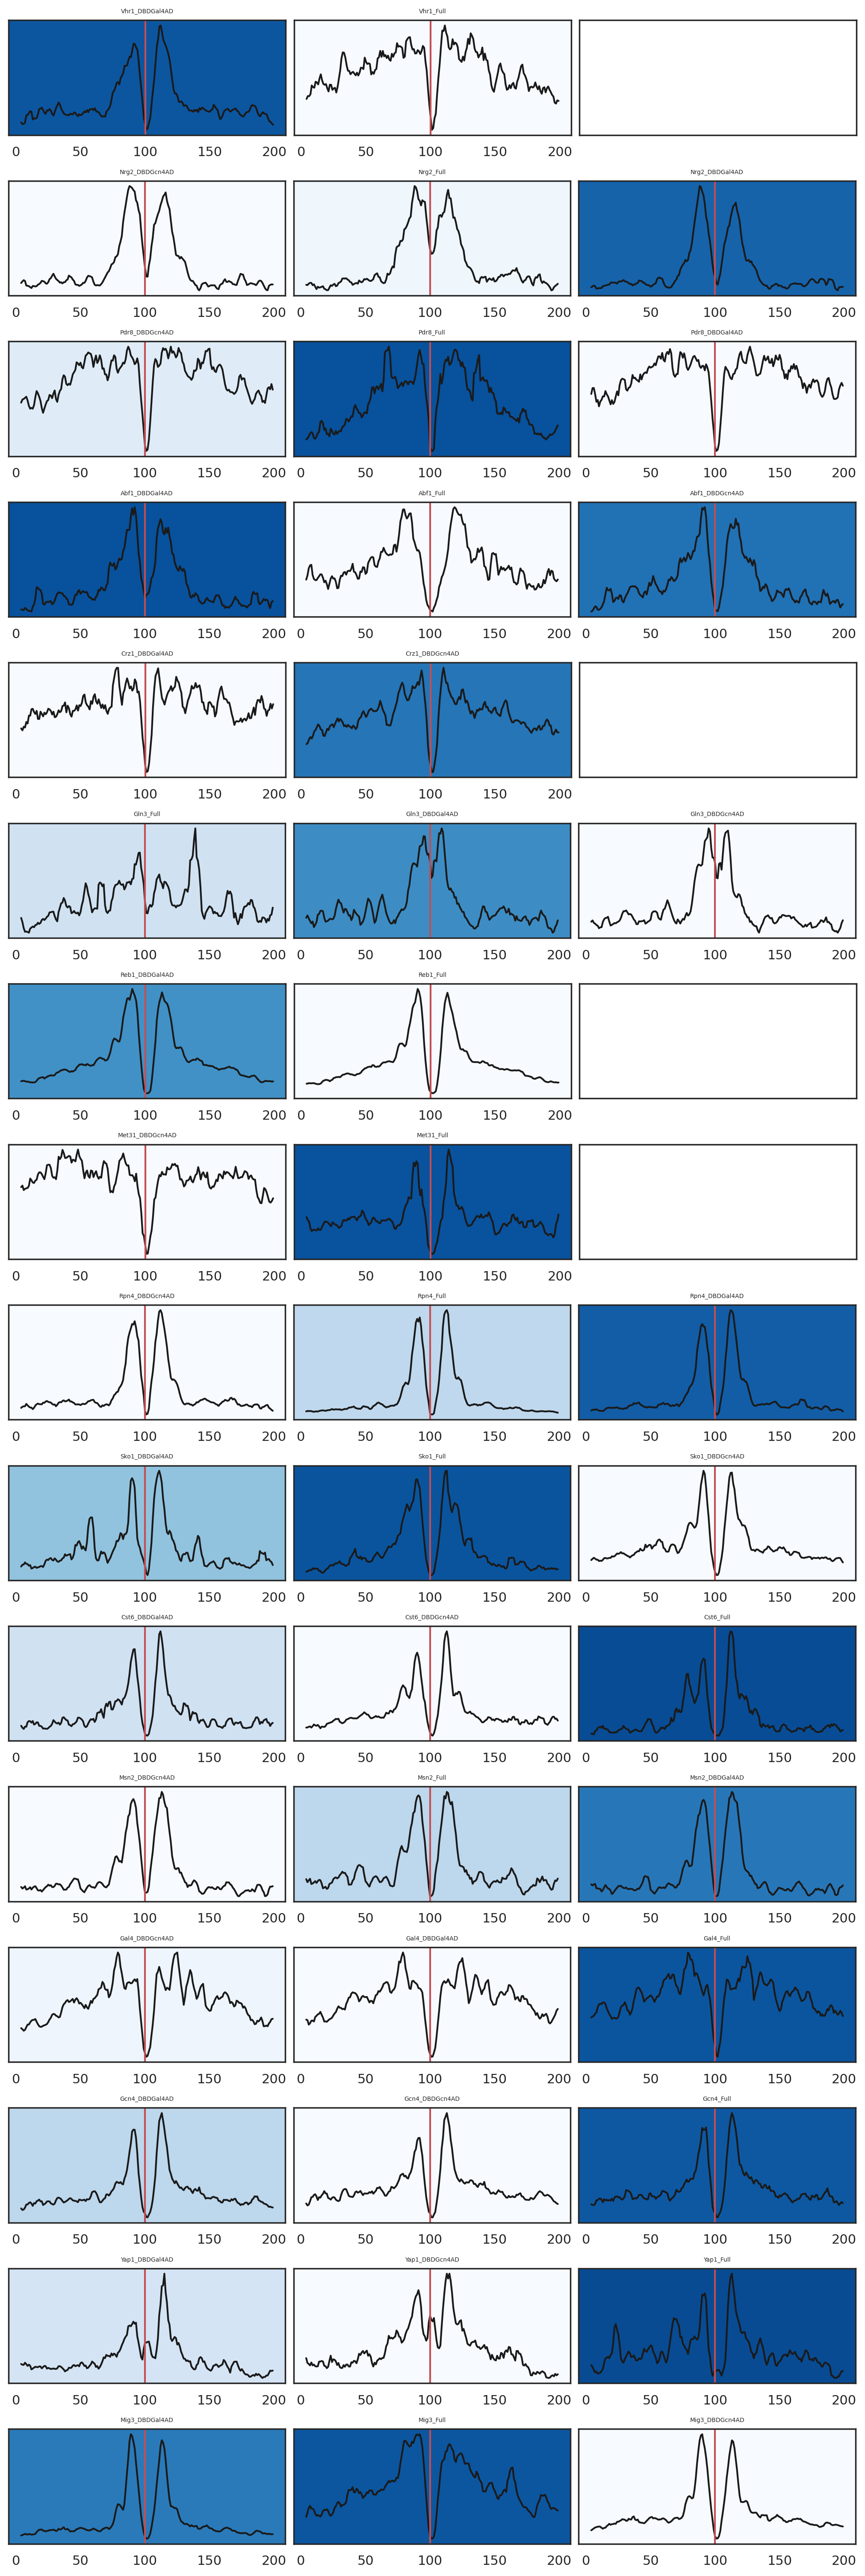

In [59]:
cmap = sns.color_palette('Blues', as_cmap=True)
fig=plt.figure(constrained_layout=True, figsize=(10,30))
subfigs = fig.subfigures(len(all_tfs),1)
for k,tf in enumerate(all_tfs):
    sns.set_style('white')
    curr_tf = bign.filter(regex='^{}'.format(tf)).filter(regex='tef').columns.values
    ax = subfigs[k].subplots(1, 3, sharey=False)


    mt_ht = load_hits(tf)
    dat_list = []
    max_list = []
    names = []
    for num,i in enumerate(curr_tf):
        name, sig = get_abs(bign.loc[:, i], mt_ht)
        smooth = pd.DataFrame(sig).rolling(window=5, axis=1).mean()

        dat_list.append(smooth.mean())
        max_list.append(smooth.mean().max())
        names.append(name)
    for num,i in enumerate(dat_list):
        normc = mpl.colors.Normalize(vmin=np.array(max_list).min(),vmax=np.array(max_list).max()+np.array(max_list).max()*0.1)


        ax[num].plot(dat_list[num], c='k')
        ax[num].set_title(convert_name(tf, names[num]), size=5)
        ax[num].set_facecolor(cmap(normc(max_list[num])))
        ax[num].set_yticklabels('')
        ax[num].axvline(100, c='r')

    if num!=2:
        ax[-1].set_yticklabels('')
        ax[-1].set_xticklabels('')

# fig.savefig('../figures_finalized/supp/meta_mots_nodelall.pdf', bbox_inches = 'tight')

In [62]:
import os
from Bio import motifs as mots
pseudocounts={'A':1-0.3829736683443062, 'C': 0.3829736683443062, 'G': 0.3829736683443062, 'T': 1-0.3829736683443062}
background={'A':(1-0.3829736683443062)/2, 'C': 0.3829736683443062/2, 'G': 0.3829736683443062/2, 'T': (1-0.3829736683443062)/2}
import logomaker

In [63]:
tfs=['Nrg2', 'Pdr8', 'Abf1', 'Crz1', 'Gln3', 'Reb1', 'Met31', 'Rpn4', 'Sko1', 'Cst6', 'Msn2', 'Gal4', 'Gcn4', 'Yap1', 'Mig3', 'Gln3', 'Rpn4', 'Vhr1']
codes=['M00909_2.00', 'M00098_2.00', 'M00001_2.00', 'M00038_2.00', 'M00048_2.00', 'M00063_2.00', 'M00040_2.00', 'M00017_2.00',
       'M00907_2.00', 'M00014_2.00', 'M00036_2.00', 'M01599_2.00', 'YEL009C_1363', 'M01524_2.00', 'M00023_2.00', 'M00048_2.00', 'M00017_2.00', 'M00917_2.00']
code_tf = dict(zip(codes, tfs))

with open('../data/Saccharomyces_cerevisiae_CISBP2_edited.meme') as handle:
    record = mots.parse(handle, "minimal")
    motifs_d_f_r = dict()
    for r in record:
        r.pseudocounts = pseudocounts
        r.background = background
        f_m = r.pssm
        r_m = r.reverse_complement().pssm
        if r.name in list(code_tf.keys()):
            motifs_d_f_r[code_tf[r.name]] = (f_m, r_m)

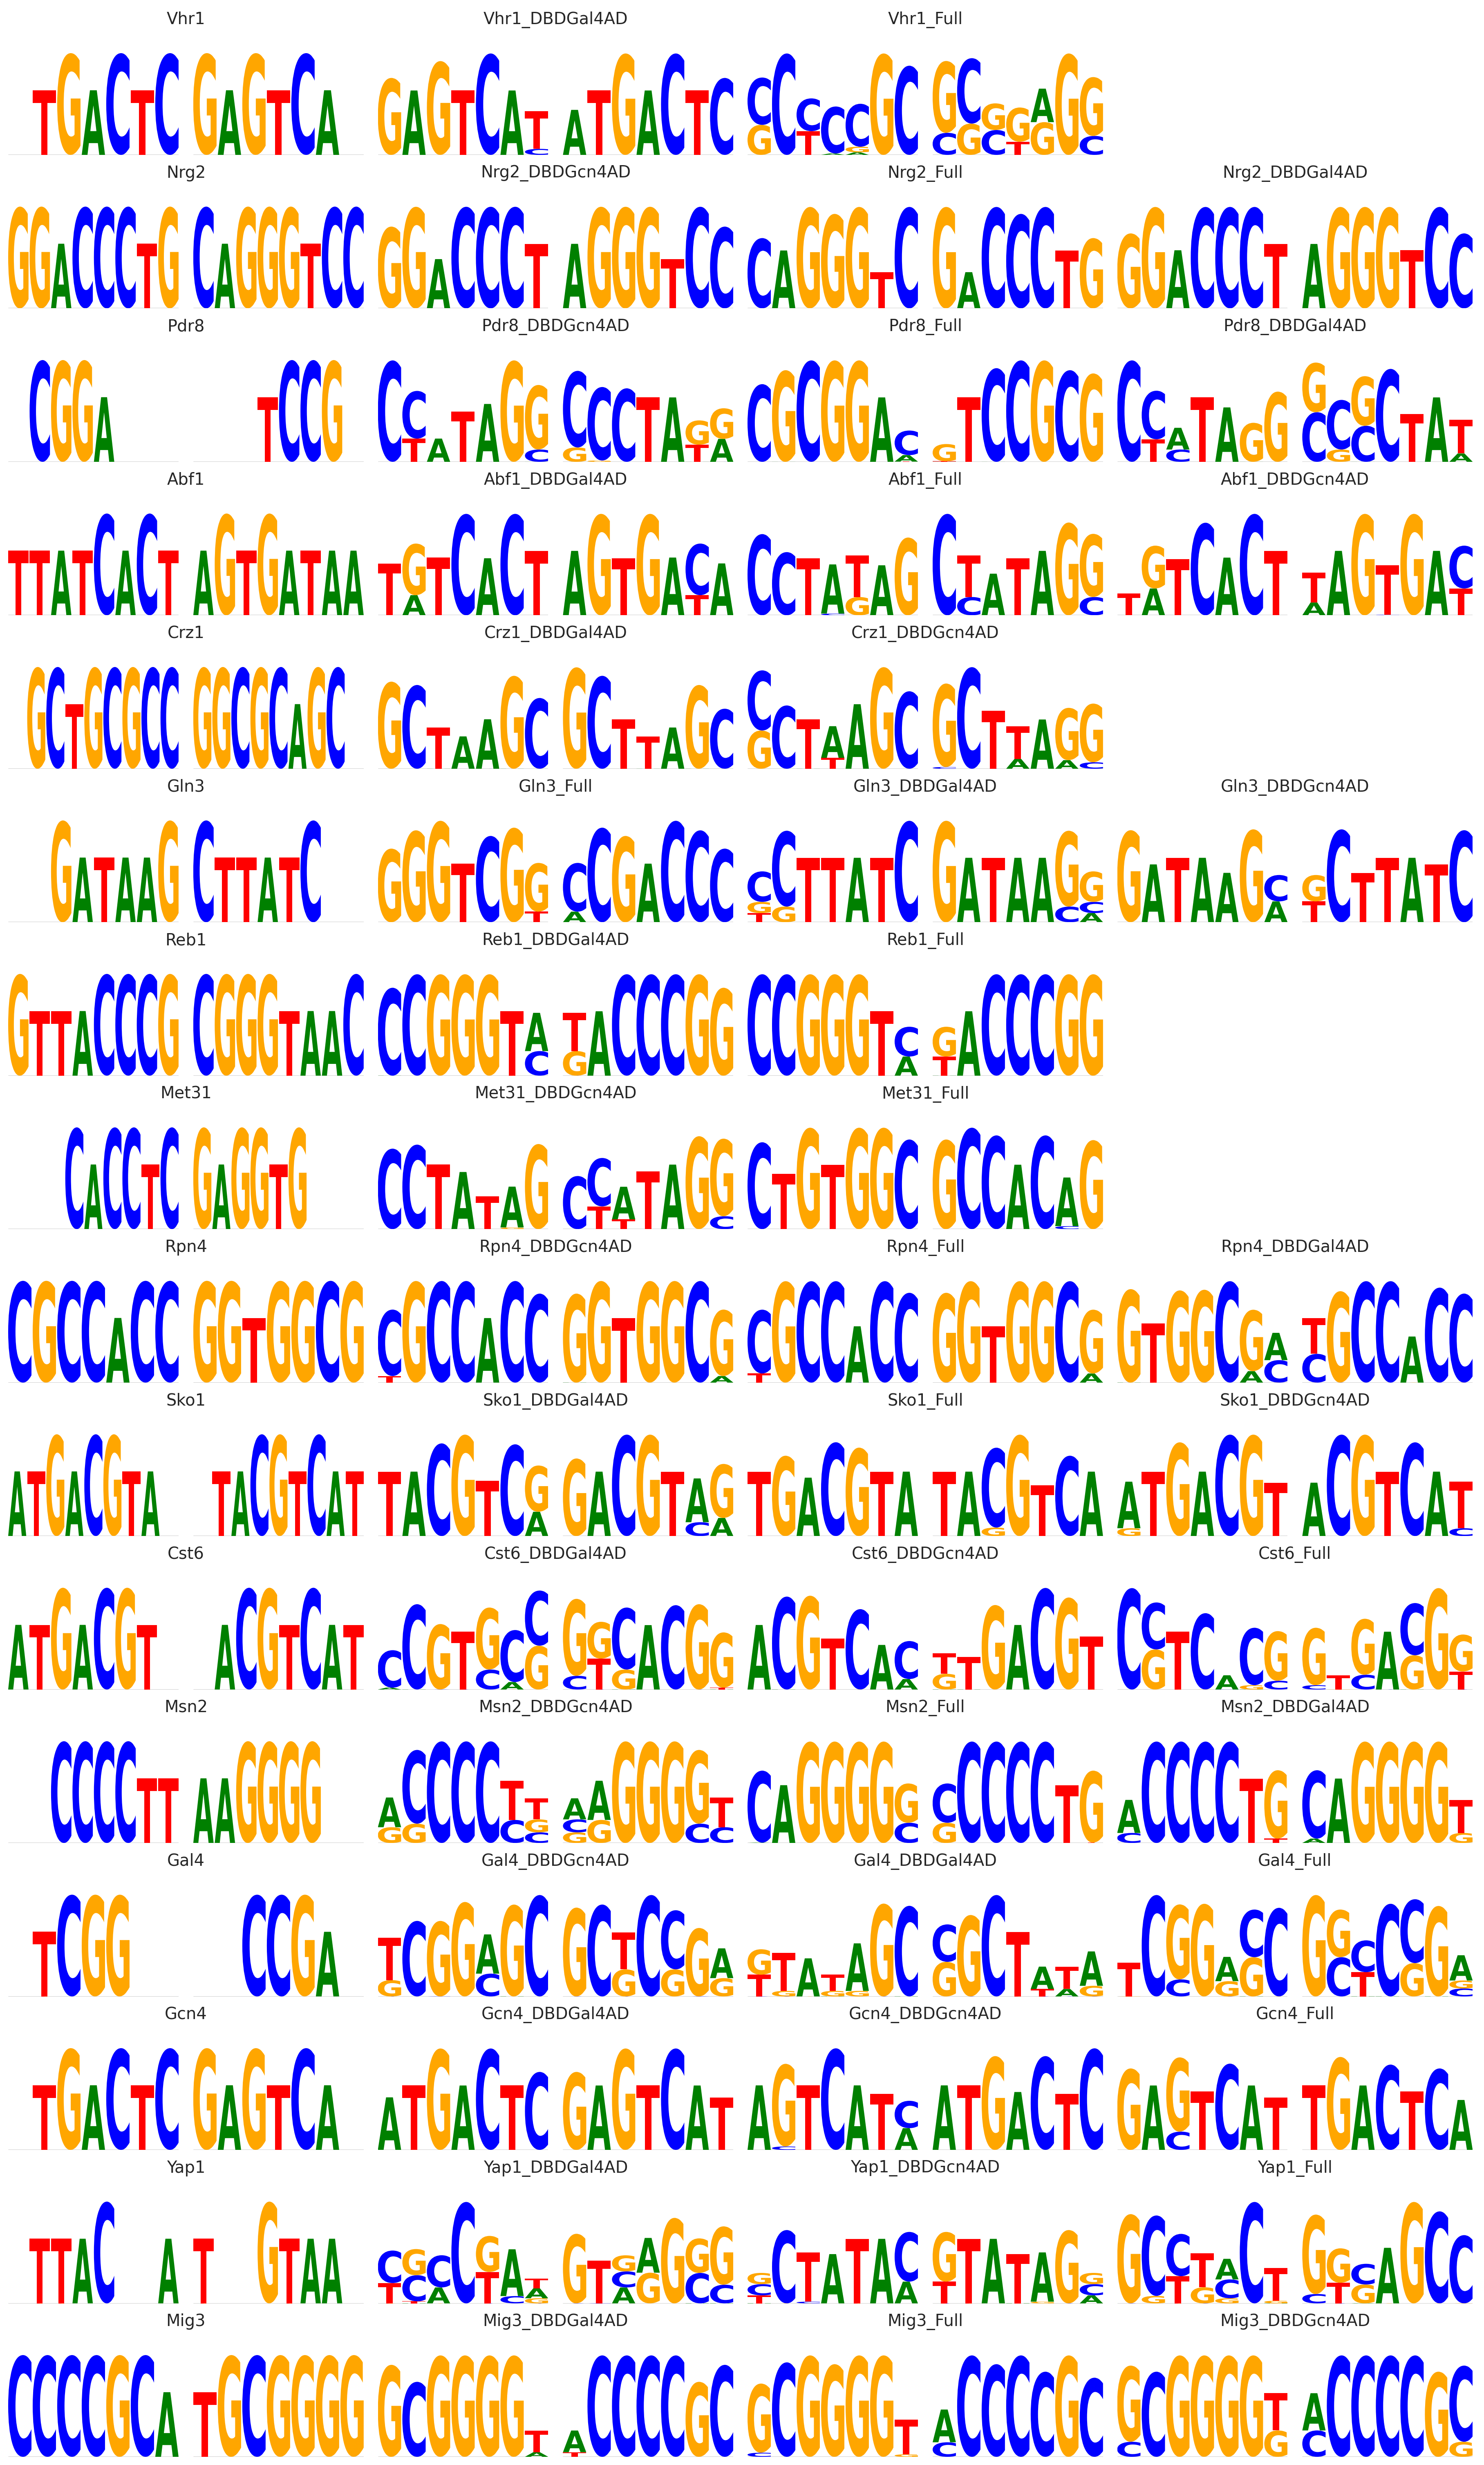

In [74]:

fig = plt.figure(figsize=(18,30), constrained_layout=True)
subfigs = fig.subfigures(len(all_tfs), 1)
lim = 1.5

for k, tf in enumerate(all_tfs):
    nested_subf=subfigs[k].subfigures(1, 4)
    to_plot_logo = bign.filter(regex='^{}'.format(tf))
    ax = nested_subf[0].subplots(1,2, sharey=True)
    f_m, r_m = motifs_d_f_r[tf]

    a = logomaker.Logo(pd.DataFrame(f_m), show_spines=False, ax=ax[0])
    b = logomaker.Logo(pd.DataFrame(r_m), show_spines=False, ax=ax[1])
    a.ax.set_ylim([0,lim])
    b.ax.set_ylim([0,lim])
    a.ax.set_xticklabels('')
    b.ax.set_xticklabels('')
    a.ax.set_yticklabels('')
    b.ax.set_yticklabels('')
    nested_subf[0].suptitle(tf)
    
    for i,strain in enumerate(to_plot_logo):
        ax = nested_subf[i+1].subplots(1,2, sharey=True)
        f,r = glob.glob(os.path.join('../data/motif_pwms/', '_'.join(strain.split('_')[:-1]).replace('.', '_')+'*'))
        with open(f, 'r') as l:
            f_m = mots.read(l, 'pfm-four-rows')
            f_m.pseudocounts = pseudocounts
            f_m.background = background

        with open(r, 'r') as l:
            r_m = mots.read(l, 'pfm-four-rows')
            r_m.pseudocounts = pseudocounts
            r_m.background = background

        a = logomaker.Logo(pd.DataFrame(f_m.pssm), show_spines=False, ax=ax[0])
        b = logomaker.Logo(pd.DataFrame(r_m.pssm), show_spines=False, ax=ax[1])
        a.ax.set_ylim([0,lim])
        b.ax.set_ylim([0,lim])
        a.ax.set_xticklabels('')
        b.ax.set_xticklabels('')
        a.ax.set_yticklabels('')
        b.ax.set_yticklabels('')
        nested_subf[i+1].suptitle(convert_name(tf,strain))
# fig.savefig('../figures_finalized/supp/seqlogos.pdf', bbox_inches = 'tight')